In [1]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp 
#import the entire linear model
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr 


In [2]:
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/ActivatedInsight.xlsx'
data1 = pd.read_excel(current_path + file)

In [3]:
#First two rows are excel column names that only exists for some columns. Remove them for now.
#Also some of the last few rows have no data in most columns.
data2 = data1.iloc[2:-13]

#Columns containing Tenure months for the GM, Chef, Sales, Office Managers (some missing values)
TenureMonth = data2.iloc[:,[6,8,10,12]]

# dataX will be just the Questionare answers
dataX = data2.iloc[:,13:]

# dataY will be just the occupany column
dataY = data2.iloc[:,3]

#LocationCode will contain the column for the location code
LocationCode = data2.iloc[:,2]

# TurnOver will be contain the turn over rate
TurnOver = data2.iloc[:,4]

In [4]:
#Change the data type to float (from object).
dataY2=(pd.to_numeric(dataY, errors='coerce'))

LocationCode2=(pd.to_numeric(LocationCode, errors='coerce'))

TurnOver2=(pd.to_numeric(TurnOver, errors='coerce'))

In [5]:
#Change the data type to float for the Employee Answers
dataX2 = pd.DataFrame().reindex_like(dataX)

#Try to run a for loop to change each column to float type
for index in range(dataX.shape[1]):
   
   # Select column by index position using iloc[]
    dataX2.iloc[:,index] = (pd.to_numeric(dataX.iloc[:,index], errors='coerce'))


In [6]:
#Do the same for the Tenure data frame.
TenureMonth2 = pd.DataFrame().reindex_like(TenureMonth)

#Try to run a for loop to change each column to float type
for column in range(TenureMonth.shape[1]):
   
   # Select column by index position using iloc[]
    TenureMonth2.iloc[:,column] = (pd.to_numeric(TenureMonth.iloc[:,column], errors='coerce'))

In [7]:
# Read csv for the median income 
file = '/datasets/ActivatedInsights/ACS175YRS1903.csv'
IncomeData = pd.read_csv(current_path + file, header=1)

In [8]:
# Read the sheet for the location code to zip code mapping
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/ActivatedInsight.xlsx' #slash was wrong fixed to the correct back slash
CodeToZip = pd.read_excel(current_path + file, sheet_name = 5, header = 1)

In [9]:
#Convert to the integer?
#make the CotdeToZipNumeric the same size
CodeToZipNumeric = pd.DataFrame().reindex_like(CodeToZip)

#Try to run a for loop to change each column to float type
for index in range(CodeToZip.shape[1]):
   
   # Select column by index position using iloc[]
    CodeToZipNumeric.iloc[:,index] = (pd.to_numeric(CodeToZip.iloc[:,index], errors='coerce'))



In [10]:
#Rename the column for the mdian income
IncomeData.rename(columns={'Median income (dollars); Estimate; Households': 'MedianIncome'}, inplace=True)

#GO through all the location data and make an array that contains the median income.

#First reset the index of the LocationCode
LocationCode3=LocationCode2.reset_index(drop=True)

#make a new series with same shape as LocationCode. This will contain Median Income Data
#MedianIncomeData = pd.DataFrame().reindex_like(dataY3)
RowIndex1=range(LocationCode3.shape[0])
MedianIncomeData = pd.DataFrame(columns=['MedianIncomeForZip'], index=RowIndex1)
 
#for loop to get the Median income for each location's zip code.
for row in range(LocationCode3.shape[0]):
    
    ZipCode=CodeToZip.loc[CodeToZip['Code'] == LocationCode3[row],:]
    #Zip Code actually is a big list of all the rows that had the location code.
    #They should all point to the same zip code (in the second column) so chose the top one.
    ZipCodeSelect=ZipCode.iloc[0,1]
    
    #Get the value for the median income corresponding to the ZipCodeSelect
    MedianIncomeValue1 = IncomeData.loc[ IncomeData['Id2'] == ZipCodeSelect , 'MedianIncome' ]
    #make it numeric
    MedianIncomeValue2=pd.to_numeric(MedianIncomeValue1, errors='coerce')
    #need to figure out why I need to specify the value instead of the index-value pair
    MedianIncomeData.iloc[row]=MedianIncomeValue2.iloc[0]
   
   
    # Select column by index position using iloc[]
   # dataX3.iloc[:,index] = (pd.to_numeric(data2.iloc[:,index], errors='coerce'))

In [11]:
TenureMonth2.describe()
#we notice that there are some missing values. It's probably best to take the median and replace with it.

,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12
count,250.000000,238.000000,245.000000,241.000000
mean,32.404000,54.441176,23.118367,33.004149
std,32.775505,62.580671,24.281104,34.692038
min,0.000000,0.000000,0.000000,0.000000
25%,7.000000,10.000000,5.000000,9.000000
50%,16.000000,30.000000,13.000000,19.000000
75%,53.750000,78.750000,37.000000,46.000000
max,147.000000,325.000000,113.000000,210.000000


In [12]:
#Check where the missing values are.
TenureMonth2.loc[(TenureMonth2['Unnamed: 6'].isnull()) |
              (TenureMonth2['Unnamed: 8'].isnull()) |
              (TenureMonth2['Unnamed: 10'].isnull()) |
              (TenureMonth2['Unnamed: 12'].isnull())]

,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12
6,13.0,36.0,66.0,NaN
31,14.0,80.0,7.0,NaN
35,138.0,NaN,14.0,12.0
41,34.0,29.0,37.0,NaN
43,61.0,21.0,NaN,7.0
46,24.0,137.0,0.0,NaN
49,79.0,127.0,NaN,13.0
51,92.0,12.0,NaN,32.0
53,49.0,10.0,NaN,43.0
54,0.0,NaN,4.0,27.0


In [13]:
#Replace the missing data for Tenure of GM with median values.
MedianTenureGM = TenureMonth2.loc[:,'Unnamed: 6'].median()

TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 6'].isnull())] = MedianTenureGM

In [14]:
#Replace the chef, sales leader, and office manager's missing tenure with their median
MedianTenureChef = TenureMonth2.loc[:,'Unnamed: 8'].median()
MedianTenureSales = TenureMonth2.loc[:,'Unnamed: 10'].median()
MedianTenureOffice = TenureMonth2.loc[:,'Unnamed: 12'].median()


TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 8'].isnull())] = MedianTenureChef
TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 10'].isnull())] = MedianTenureSales
TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 12'].isnull())] = MedianTenureOffice

''

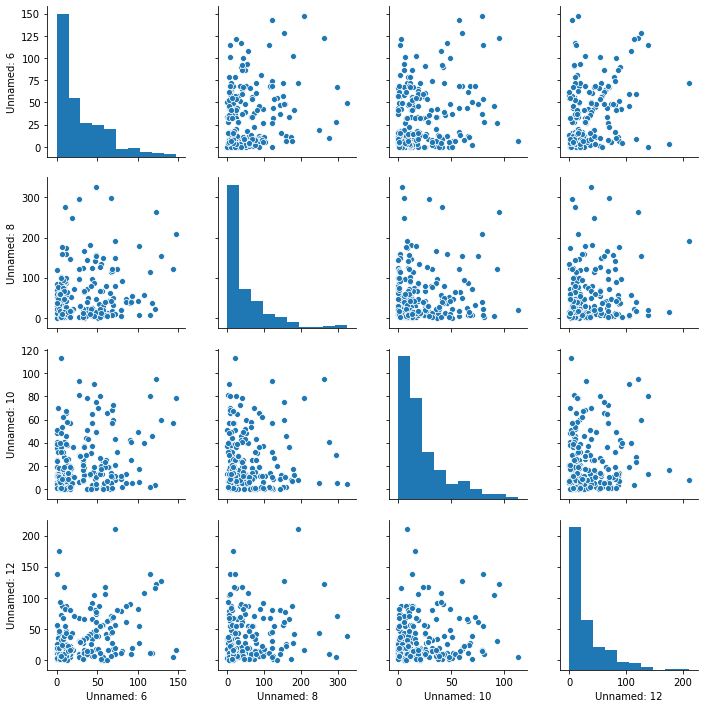

In [15]:
#Tenure monthes are extrenely poistively skewed. May be log (x+1) transform?
sb.pairplot(TenureMonth2)
;

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe918c30b8>]],
      dtype=object)

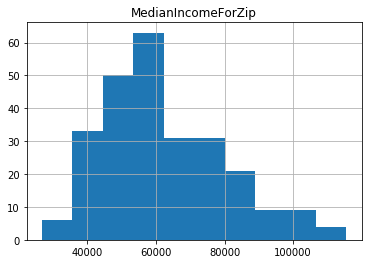

In [16]:
#Median income is also poistively skewed.
MedianIncomeData.hist()

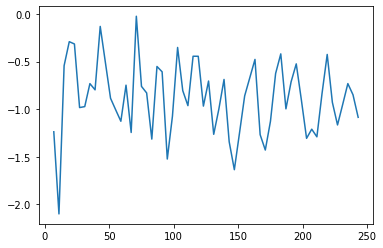

In [17]:
#Employee response featres are all negatively skewed.
skewValue = dataX2.skew(axis=0)
sb.lineplot(data=skewValue)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe9101e978>,
      dtype=object)

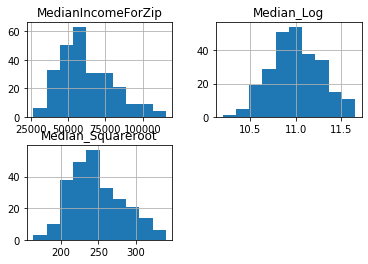

In [18]:
#MedianIncomeData is positively skewed.
#Apply sqrt
MedianIncomeData['Median_Squareroot']=MedianIncomeData['MedianIncomeForZip']**(1/2)
#Take log
MedianIncomeData['Median_Log']=np.log(MedianIncomeData['MedianIncomeForZip'])
MedianIncomeData.hist()

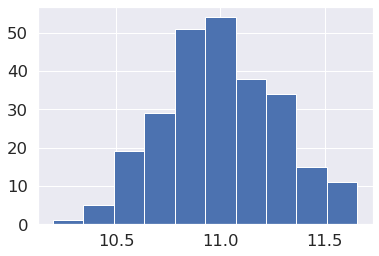

In [19]:
#Save the hisogram for the log transformed median income.
sb.set(font_scale=1.5)
sns_plot = MedianIncomeData.iloc[:,2].hist()
sns_plot.figure.savefig("MedianIncomeLog.png")

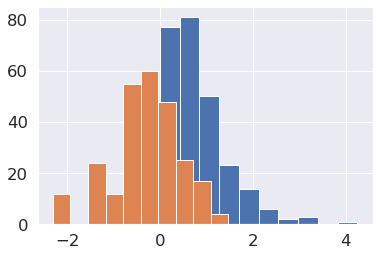

In [20]:
#Start transforming the data
#For the room occupancy number and turnover we check below, looks like the Turnover should be at least log transformed.
#Also add 0.1 because we don't want the zero turnover.
TurnOver2.hist()
LogTurnover=np.log(TurnOver2+0.1)
LogTurnover.hist()

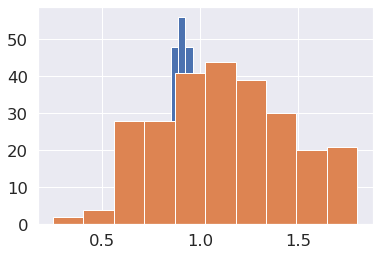

In [21]:
#For room occupancy.
dataY2.hist()
#it's negatively skewed so flip, take log, then flip back.
dataY2Flip=1.1-dataY2
dataY2Log=np.log(dataY2Flip)
OccupancyLogFlip=-0.5-dataY2Log
OccupancyLogFlip.hist()

In [22]:
#For the DataX, because they are mostly negative, flip it by subtracting it from 1.1 and then use log transform.
#After that flip back again by subtracting it from another value.
NewDataX2=1.1-dataX2
NewDataX2Log=NewDataX2.apply(np.log) # returns DataFrame
NewDataX2LogFlip=0.1-NewDataX2Log


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe85567390>,
      dtype=object)

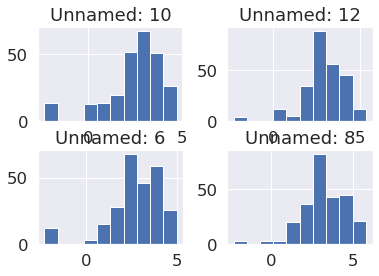

In [23]:
#We need to log transform the TenureMonth3, but add 0.1 so that we don't have to deal with the log of zero.
NewTenureMonth2=TenureMonth2+0.1
NewTenureMonth2Log=NewTenureMonth2.apply(np.log) # returns DataFrame
NewTenureMonth2Log.hist()

In [24]:
#Now we have more or less normally distributed input variables.
#We have NewDataX3LogFlip for the employee response
#We have LogTurnover for the turnover rate.
#We have OccupancyLogFlip for the occupancy.
#We have MedianIncomeData['Median_Log']=np.log(MedianIncomeData['MedianIncomeForZip']) for Median Income Data
#We have NewTenureMonth3Log

#Standarize
scalerEmployeeResponse = pp.StandardScaler().fit(NewDataX2LogFlip)
EmployeeResponse = scalerEmployeeResponse.transform(NewDataX2LogFlip)
EmployeeResponseDF=pd.DataFrame(data=EmployeeResponse)

scalerMedianIncomeData = pp.StandardScaler().fit(MedianIncomeData)
MedianIncomeDataS = scalerMedianIncomeData.transform(MedianIncomeData)
MedianIncomeDataSDF=pd.DataFrame(data=MedianIncomeDataS)

scalerTenureMonth = pp.StandardScaler().fit(NewTenureMonth2Log)
TenureMonthS = scalerTenureMonth.transform(NewTenureMonth2Log)
TenureMonthSDF=pd.DataFrame(data=TenureMonthS)

OccupancyTurnover=pd.concat([OccupancyLogFlip, LogTurnover], axis=1)

scalerOccupancyTurnover = pp.StandardScaler().fit(OccupancyTurnover)
OccupancyTurnoverS = scalerOccupancyTurnover.transform(OccupancyTurnover)
OccupancyTurnoverSDF=pd.DataFrame(data=OccupancyTurnoverS)



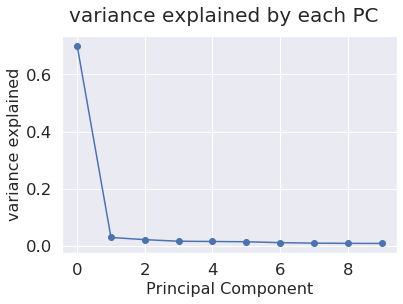

In [25]:
#Because we have 60 columns for Employee response, we will take the PCA for this one and reduce the dimension
#Then first try linear regression, then perhaps logit regression or other regressions.

#Looks like we finally have them in a format we can use
    
#Run PCA to reduce the features to the top 10 or so.
from sklearn.decomposition import PCA

#Chose 10 components for now because we know this should be enough for this dataset
pca1=PCA(n_components=10)
pca1.fit(EmployeeResponseDF)

#check the variance explained.
#print(pca.explained_variance_ratio_)
plt.plot(pca1.explained_variance_ratio_,'o-')
plt.suptitle('variance explained by each PC', fontsize = 20)
plt.ylabel('variance explained', fontsize = 16)
plt.xlabel('Principal Component', fontsize=16)
plt.show()

#trasform the Data
DataArrayPCA1=pca1.transform(EmployeeResponseDF)

#plt.scatter(DataArrayPCA[:,0],DataArrayPCA[:,1])
#plt.show()

#Looks like we need only one PC! I guess it measures one thing very well. Which is great.


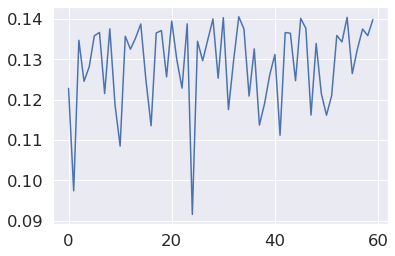

In [26]:
#Get the weights of each feature in PC1
ComponentWeight = pd.DataFrame(pca1.components_)
sb.lineplot(data=ComponentWeight.iloc[0,:])

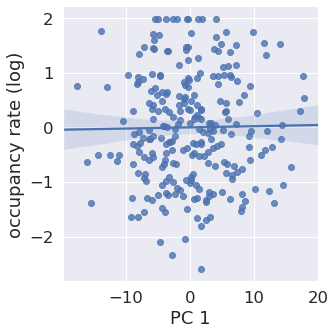

In [27]:

#Put together into a single data frame so we can plot easier
frameOccupancy = { 'occupancy rate (log)': OccupancyTurnoverSDF.iloc[:,0], 'PC 1': DataArrayPCA1[:,0] } 
dataForPlotOccupancy = pd.DataFrame(frameOccupancy)
sb.lmplot(x='PC 1', y='occupancy rate (log)', data=dataForPlotOccupancy)


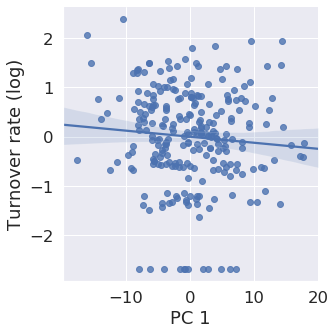

In [28]:
#Put together into a single data frame so we can plot easier
frameTurnover = { 'Turnover rate (log)': OccupancyTurnoverSDF.iloc[:,1], 'PC 1': DataArrayPCA1[:,0] } 
dataForPlotTurnover = pd.DataFrame(frameTurnover)
sb.lmplot(x='PC 1', y='Turnover rate (log)', data=dataForPlotTurnover)

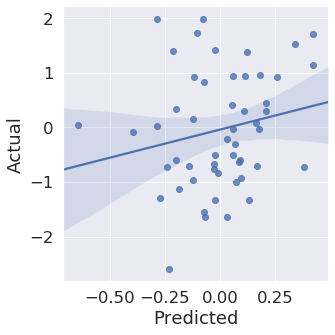

In [29]:
#put together all the features and run the multivariate linear regression model.
PCA_DF=pd.DataFrame(data=DataArrayPCA1)

Features = pd.concat([PCA_DF.iloc[:,0], MedianIncomeDataSDF.iloc[:,2], TenureMonthSDF], axis=1)

target=OccupancyTurnoverSDF.iloc[:,0]
target2 = OccupancyTurnoverSDF.iloc[:,1]



#Specify the features and a target (Occupancy)
x = Features
y = target

#Split it 80 - 20 for now

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train) #training the algorithm

Y_pred = lm.predict(X_test)

ActualPrediction = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction)


In [30]:
#Check the coefficients.
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
0,-0.005372
2,0.092195
0,0.099433
1,0.105921
2,0.133581
3,0.024778


In [31]:
lm.score(x,y)


0.049927266928759484

In [32]:
#May be we are supposed to use this instead of the above?
r2_score(Y_test, Y_pred)

0.03816793322463441

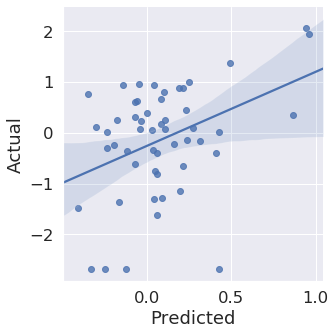

In [33]:
#Specify the features and a target (turnover)
x2 = Features
y2 = target2

#Split it 80 - 20 for now

X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X2_train, Y2_train) #training the algorithm

Y2_pred = lm2.predict(X2_test)

ActualPrediction2 = pd.DataFrame({'Actual': Y2_test, 'Predicted': Y2_pred})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction2)

In [34]:
lm2.score(x2,y2)


0.07508419114825338

In [35]:
#May be we are supposed to use this instead of the above?
r2_score(Y2_test, Y2_pred)

0.09890655150645089

In [36]:
#Check the coefficients.
coeff_df = pd.DataFrame(lm2.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
0,-0.003435
2,0.036047
0,-0.006682
1,-0.178530
2,-0.046720
3,-0.141728


(-0.20808348600528925, 0.0007896874131314261)

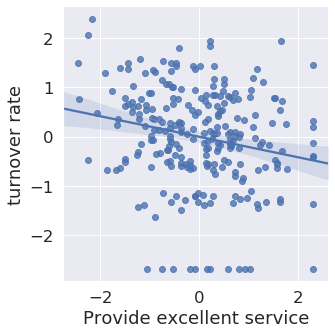

In [37]:
#Still doesn't look that great. For sanity check let's plot what the answer to one question looks like
#Question number for "Do you intend to stay long term" is 47 (starting with 0)
#Actually 55 "do you think you make a difference" is better predictor.
#Get the employee turn over rate and plot that against the PC1.
#Put together into a single data frame so we can plot easier
frameMVP = { 'turnover rate': target2, 'Provide excellent service': EmployeeResponseDF.iloc[:,55] } 
dataForPlotMVP = pd.DataFrame(frameMVP)
# Recommended way
sb.lmplot(x='Provide excellent service', y='turnover rate', data=dataForPlotMVP)

pearsonr(EmployeeResponseDF.iloc[:,55], target2)

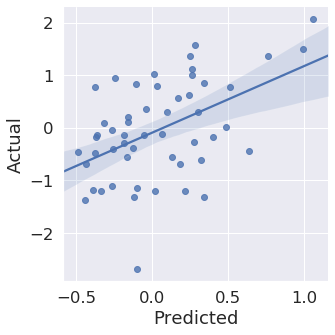

In [74]:
#Specify the features and a target (turnover)
Features2 = pd.concat([EmployeeResponseDF.iloc[:,55], MedianIncomeDataSDF.iloc[:,2], TenureMonthSDF], axis=1)


x3 = Features2
y3 = target2

#Split it 80 - 20 for now

X3_train, X3_test, Y3_train, Y3_test = train_test_split(x3, y3, test_size=0.2, random_state=10)
lm3 = linear_model.LinearRegression()
model3 = lm3.fit(X3_train, Y3_train) #training the algorithm

Y3_pred = lm3.predict(X3_test)

ActualPrediction3 = pd.DataFrame({'Actual': Y3_test, 'Predicted': Y3_pred})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction3)

In [39]:
lm3.score(x3,y3)

0.10426495927839696

In [75]:
#May be we are supposed to use this instead of the above?
r2_score(Y3_test, Y3_pred)

0.21882730853805088

In [41]:
coeff_df = pd.DataFrame(lm3.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
0,-0.118953
2,0.025637
0,0.017573
1,-0.175730
2,-0.043323
3,-0.152154


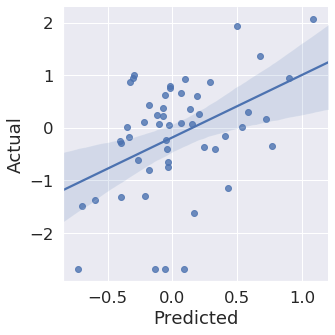

In [42]:
#Try random forrest regression. Use the best one above and try to predict the turn over rate.
#For here we still use one time point.

x4 = Features2
y4 = target2

#Split it 80 - 20 for now

X4_train, X4_test, Y4_train, Y4_test = train_test_split(x4, y4, test_size=0.2, random_state=0)

#Use random forrest regression.

from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(X4_train, Y4_train);

# Use the forest's predict method on the test data
predictions = rf.predict(X4_test)

ActualPrediction4 = pd.DataFrame({'Actual': Y4_test, 'Predicted': predictions})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction4)

In [43]:
#Very high prediction! But was the info on the Employee response used?
rf.score(x4,y4)


0.6997602915172796

In [44]:
#May be we are supposed to use this instead of the above?
r2_score(Y4_test, predictions)

0.15188148471194585

In [45]:
#Or use this? This is probably the test score.
rf.score(X4_test,Y4_test)
#This is the same number as above. Probably 

0.15188148471194585

In [46]:
#This is probably the training score. We over fit?
rf.score(X4_train, Y4_train)

0.8667193270976081

In [47]:
rf.feature_importances_

array([0.1824156 , 0.2064885 , 0.14508815, 0.15901526, 0.1462377 ,
       0.16075478])

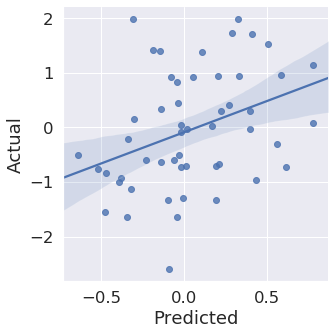

In [48]:
#Try random forrest regression. Use the best one above and try to predict the occupancy rate now.
#For here we still use one time point.

x5 = Features2
y5 = target

#Split it 80 - 20 for now

X5_train, X5_test, Y5_train, Y5_test = train_test_split(x5, y5, test_size=0.2, random_state=0)

#Use random forrest regression.

from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf2.fit(X5_train, Y5_train);

# Use the forest's predict method on the test data
predictions2 = rf2.predict(X5_test)

ActualPrediction5 = pd.DataFrame({'Actual': Y5_test, 'Predicted': predictions2})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction5)

In [49]:
rf2.score(x5, y5)

0.6977526403706217

In [50]:
#May be we are supposed to use this instead of the above?
r2_score(Y5_test, predictions2)

0.12302157086588428

In [51]:
#Or use this? This is probably the test score.
rf2.score(X5_test,Y5_test)
#This is the same number as above. Probably 

0.12302157086588428

In [52]:
rf2.feature_importances_

array([0.15967769, 0.20878583, 0.13769757, 0.16958579, 0.20910721,
       0.1151459 ])

In [53]:
#Try visualizing one of the trees for the first random forrest (predicing the turn over rate)

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

#get the names of columns (currently not descriptive)
# Saving feature names for later use
feature_list = list(Features2.columns)

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

#It's a very complex tree.

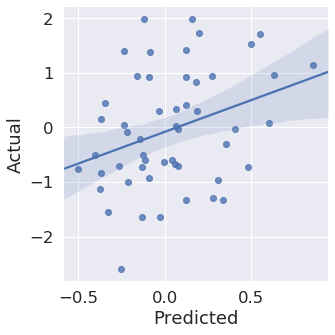

In [54]:
#See if the PC 1 can be a good predictor if we use it in a random forrest model.
#Try random forrest regression. Use the best one above and try to predict the occupancy rate now.
#For here we still use one time point.

x6 = Features
y6 = target

#Split it 80 - 20 for now

X6_train, X6_test, Y6_train, Y6_test = train_test_split(x6, y6, test_size=0.2, random_state=0)

#Use random forrest regression.

from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf3 = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf3.fit(X6_train, Y6_train);

# Use the forest's predict method on the test data
predictions3 = rf3.predict(X6_test)

ActualPrediction6 = pd.DataFrame({'Actual': Y6_test, 'Predicted': predictions3})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction6)

In [55]:
rf3.score(X6_test,Y6_test)


0.10031393742286789

In [56]:
rf3.feature_importances_

array([0.16213254, 0.2069831 , 0.13844584, 0.16710975, 0.21016058,
       0.1151682 ])

r^2 on test data : 0.065849
With Lasso's score function: 0.065849


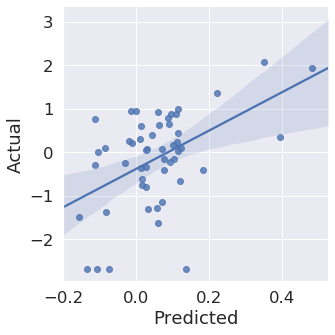

In [57]:
#Now try lasso with all the featueres and see which one is left
#Specify the features and a target (turnover)
Features3 = pd.concat([EmployeeResponseDF, MedianIncomeDataSDF.iloc[:,2], TenureMonthSDF], axis=1)


x7 = Features3
y7 = target2 #Turn over

#Split it 80 - 20 for now

X7_train, X7_test, Y7_train, Y7_test = train_test_split(x7, y7, test_size=0.2, random_state=0)

lasso1 = Lasso(alpha=0.1)
lasso1.fit(X7_train, Y7_train)

YpredLasso = lasso1.predict(X7_test)
r2ScoreLasso = r2_score(Y7_test, YpredLasso)
print("r^2 on test data : %f" % r2ScoreLasso)
r2ScoreLasso1=lasso1.score(X7_test, Y7_test)
print("With Lasso's score function: %f" % r2ScoreLasso1)
coeff_used = np.sum(lasso1.coef_!=0)

ActualPrediction7 = pd.DataFrame({'Actual': Y7_test, 'Predicted': YpredLasso})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction7)

In [58]:
coeff_used

5

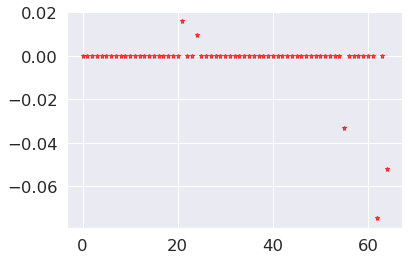

In [59]:
plt.plot(lasso1.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.1$',zorder=7) 

r^2 on test data : -0.106288
With Lasso's score function: -0.106288


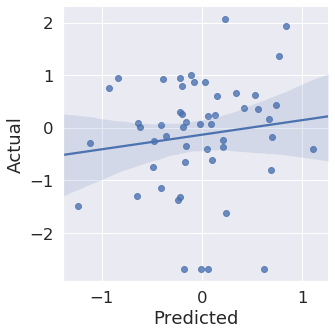

In [60]:
#Try the same but with alpha = 0.01
lasso2 = Lasso(alpha=0.01)
lasso2.fit(X7_train, Y7_train)

YpredLasso2 = lasso2.predict(X7_test)
r2ScoreLasso2 = r2_score(Y7_test, YpredLasso2)
print("r^2 on test data : %f" % r2ScoreLasso2)
r2ScoreLasso21=lasso2.score(X7_test, Y7_test)
print("With Lasso's score function: %f" % r2ScoreLasso21)
coeff_used = np.sum(lasso2.coef_!=0)

ActualPrediction8 = pd.DataFrame({'Actual': Y7_test, 'Predicted': YpredLasso2})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction8)

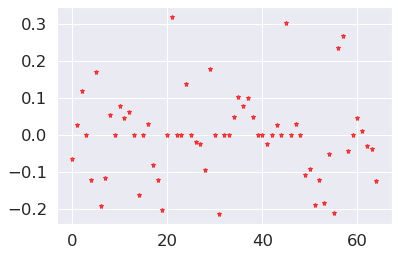

In [61]:
plt.plot(lasso2.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.01$',zorder=7) 

r^2 on test data : 0.126562
With Lasso's score function: 0.126562


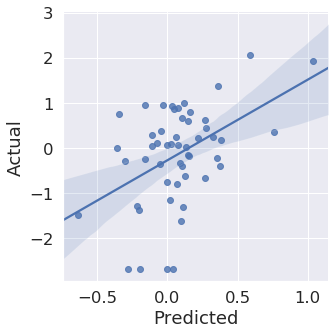

In [62]:
#Try the same but with alpha = 0.05
lasso3 = Lasso(alpha=0.05)
lasso3.fit(X7_train, Y7_train)

YpredLasso3 = lasso3.predict(X7_test)
r2ScoreLasso3 = r2_score(Y7_test, YpredLasso3)
print("r^2 on test data : %f" % r2ScoreLasso3)
r2ScoreLasso31=lasso3.score(X7_test, Y7_test)
print("With Lasso's score function: %f" % r2ScoreLasso31)
coeff_used = np.sum(lasso3.coef_!=0)

ActualPrediction9 = pd.DataFrame({'Actual': Y7_test, 'Predicted': YpredLasso3})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction9)

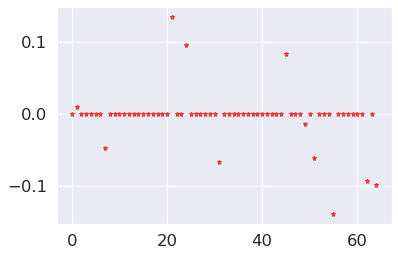

In [63]:
plt.plot(lasso3.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.05$',zorder=7) 

In [64]:
#Features3 = pd.concat([EmployeeResponseDF, MedianIncomeDataSDF.iloc[:,2], TenureMonthSDF], axis=1)
#target2 is turn over rate
#Save in pkl format.
Features3.to_pickle("./Features3.pkl")
target2.to_pickle("./target2.pkl")


r^2 on test data : 0.065849
With Lasso's score function: 0.065849


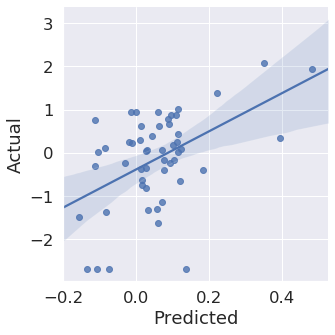

In [65]:
#Try reloading and running the analysis.
Features3 = pd.read_pickle("./Features3.pkl")
target2 = pd.read_pickle("./target2.pkl")

x7 = Features3
y7 = target2 #Turn over

#Split it 80 - 20 for now

X7_train, X7_test, Y7_train, Y7_test = train_test_split(x7, y7, test_size=0.2, random_state=0)

lasso1 = Lasso(alpha=0.1)
lasso1.fit(X7_train, Y7_train)

YpredLasso = lasso1.predict(X7_test)
r2ScoreLasso = r2_score(Y7_test, YpredLasso)
print("r^2 on test data : %f" % r2ScoreLasso)
r2ScoreLasso1=lasso1.score(X7_test, Y7_test)
print("With Lasso's score function: %f" % r2ScoreLasso1)
coeff_used = np.sum(lasso1.coef_!=0)

ActualPrediction7 = pd.DataFrame({'Actual': Y7_test, 'Predicted': YpredLasso})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction7)

r^2 on test data : 0.130556


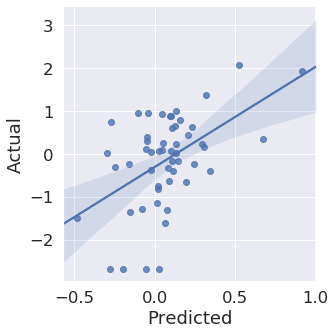

In [66]:
#Try the same but with alpha = 0.062
lasso4 = Lasso(alpha=0.062)
lasso4.fit(X7_train, Y7_train)

YpredLasso4 = lasso4.predict(X7_test)
r2ScoreLasso4 = r2_score(Y7_test, YpredLasso4)
print("r^2 on test data : %f" % r2ScoreLasso4)
#r2ScoreLasso31=lasso3.score(X7_test, Y7_test)
#print("With Lasso's score function: %f" % r2ScoreLasso31)
coeff_used = np.sum(lasso3.coef_!=0)

ActualPrediction10 = pd.DataFrame({'Actual': Y7_test, 'Predicted': YpredLasso4})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction10)

In [67]:
index=np.argsort(abs(lasso4.coef_))
index


array([ 0, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 63, 46, 48, 49,
       50, 52, 53, 54, 56, 57, 58, 59, 60, 61, 47, 30, 32, 28,  1,  2,  3,
        4,  5,  6,  8,  9, 10, 11, 12, 29, 14, 13, 16, 17, 18, 19, 20, 27,
       26, 22, 15, 25, 23,  7, 45, 51, 31, 24, 64, 62, 21, 55])

In [68]:
lasso4.coef_[24]

0.07366283026646682

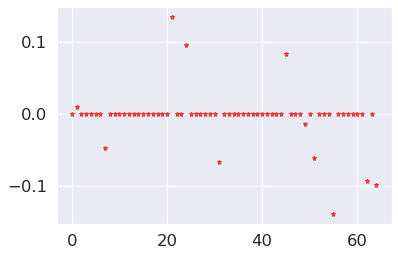

In [69]:
plt.plot(lasso3.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.05$',zorder=7) 

https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb is also a good example

In [13]:
distinctCounter = data.apply(lambda x: len(x.unique()))

In [12]:
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [14]:
# Generate feature matrix and labels array
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [15]:
# Feature scaling
featuresToScale = dataX.drop(['Time'],axis=1).columns

In [16]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [17]:
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

In [18]:
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
StDev,1.958692e+00,1.651306e+00,1.516252e+00,1.415866e+00,1.380244e+00,1.332269e+00,1.237091e+00,1.194351e+00,1.098630e+00,1.088848e+00,...,7.709237e-01,7.345227e-01,7.257003e-01,6.244592e-01,6.056460e-01,5.212772e-01,4.822262e-01,4.036318e-01,3.300827e-01,250.119670


In [19]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,...,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [20]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [21]:
correlation_file = '/datasets/credit_card_data/correlationMatrix.csv'
correlationMatrix.to_csv(current_path+correlation_file)

Text(0, 0.5, 'Frequency Percentage')

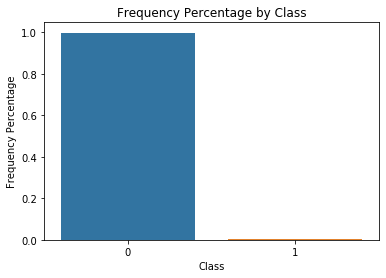

In [22]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

In [23]:
# Model Preparation

In [24]:
X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.33, 
                                    random_state=2018, stratify=dataY)

In [25]:
len(X_train)

190820

In [26]:
len(X_test)

93987

In [27]:
y_train.sum()/len(y_train)

0.0017293784718582959

In [28]:
y_test.sum()/len(y_test)

0.0017236426314277506

In [29]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

In [35]:
# Logistic Regression

#just an example to make a new dataframe.

ExampleDataFrame=pd.DataFrame(data=[y_train],index=y_train.index, columns=[0])
ExampleDataFrame.head(10)

,0
142087,0
165168,0
235908,0
148255,0
145672,0
277038,0
228711,0
135075,0
21964,0
54269,0


In [30]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

In [31]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, 
                               model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, 
                         predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.10080139188958696
CV Log Loss:  0.10490645274118293
Training Log Loss:  0.12098957040484648
CV Log Loss:  0.11634801169793386
Training Log Loss:  0.1074616029843435
CV Log Loss:  0.10845630232487576
Training Log Loss:  0.10228137039781758
CV Log Loss:  0.10321736161148198
Training Log Loss:  0.11476012373315266
CV Log Loss:  0.1160124452312548
Logistic Regression Log Loss:  0.10978811472134588


In [32]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

In [33]:
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])

In [34]:
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

Text(0.5,1,'Precision-Recall curve: Average Precision = 0.73')

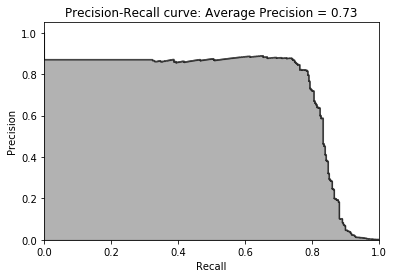

In [35]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [36]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

In [37]:
areaUnderROC = auc(fpr, tpr)

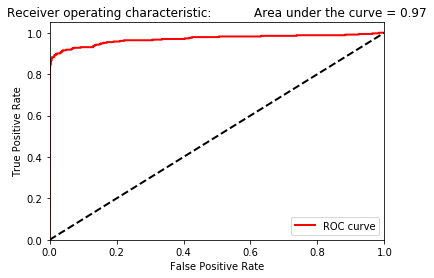

In [38]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [39]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [40]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, 
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.0003951763883952557
CV Log Loss:  0.014479198936303003
Training Log Loss:  0.0004501221178398935
CV Log Loss:  0.005712702421375242
Training Log Loss:  0.00043128813023860164
CV Log Loss:  0.00908372752510077
Training Log Loss:  0.0004341676022058672
CV Log Loss:  0.013491161736979267
Training Log Loss:  0.0004275530435950083
CV Log Loss:  0.009963232439211515
Random Forests Log Loss:  0.010546004611793962


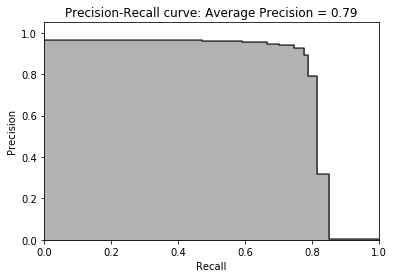

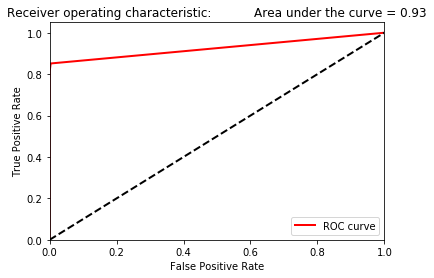

In [41]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [43]:
params_xGB = {
    'nthread':16, #number of cores
    'learning rate': 0.3, #range 0 to 1, default 0.3
    'gamma': 0, #range 0 to infinity, default 0 
        # increase to reduce complexity (increase bias, reduce variance)
    'max_depth': 6, #range 1 to infinity, default 6
    'min_child_weight': 1, #range 0 to infinity, default 1
    'max_delta_step': 0, #range 0 to infinity, default 0
    'subsample': 1.0, #range 0 to 1, default 1
        # subsample ratio of the training examples
    'colsample_bytree': 1.0, #range 0 to 1, default 1 
        # subsample ratio of features
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
    'silent':1
}

In [44]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                    index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
                 nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
    best_rounds = np.argmin(bst['test-logloss-mean'])
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossXGBoostGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

[0]	train-logloss:0.437923+2.07981e-05	test-logloss:0.438039+2.79786e-05
[50]	train-logloss:0.0001304+9.26499e-06	test-logloss:0.0030798+0.000632359
[100]	train-logloss:5.36e-05+1.85472e-06	test-logloss:0.0033054+0.000701632
[150]	train-logloss:3.98e-05+1.16619e-06	test-logloss:0.0033992+0.000714492
[200]	train-logloss:3.36e-05+1.0198e-06	test-logloss:0.0034614+0.000731778


C:\Users\ankur_\Anaconda3\envs\unsupervisedLearning\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Training Log Loss:  0.0008836359029379572
CV Log Loss:  0.0039039689005126712
[0]	train-logloss:0.437948+2.04216e-05	test-logloss:0.438052+0.000128319
[50]	train-logloss:0.0001512+7.80769e-06	test-logloss:0.0034364+0.000861248
[100]	train-logloss:5.98e-05+2.63818e-06	test-logloss:0.0037256+0.000870639
[150]	train-logloss:4.4e-05+1.54919e-06	test-logloss:0.0038536+0.000859705
[200]	train-logloss:3.7e-05+1.54919e-06	test-logloss:0.0039128+0.000865355
Training Log Loss:  0.000991403023630954
CV Log Loss:  0.0021829197781246894
[0]	train-logloss:0.437958+1.92832e-05	test-logloss:0.438062+6.62311e-05
[50]	train-logloss:0.0001388+7.70454e-06	test-logloss:0.0033034+0.000974077
[100]	train-logloss:5.74e-05+2.72764e-06	test-logloss:0.0035838+0.00112909
[150]	train-logloss:4.24e-05+1.85472e-06	test-logloss:0.0036884+0.00118733
[200]	train-logloss:3.6e-05+1.41421e-06	test-logloss:0.0037368+0.00122368
Training Log Loss:  0.0007905643530946553
CV Log Loss:  0.002716246122009492
[0]	train-logloss:0.

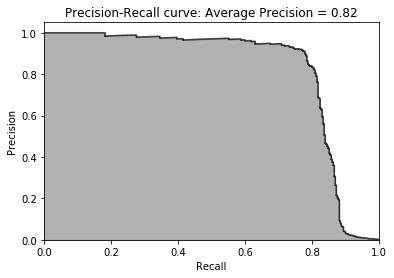

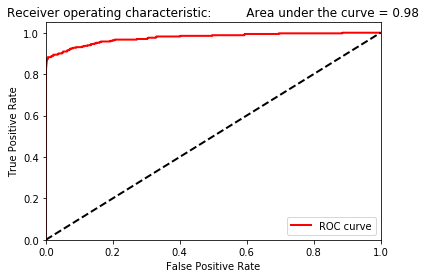

In [49]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [47]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [48]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

[1]	valid_0's binary_logloss: 0.00671734
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00665205
[3]	valid_0's binary_logloss: 0.00658131
[4]	valid_0's binary_logloss: 0.00651963
[5]	valid_0's binary_logloss: 0.00645601
[6]	valid_0's binary_logloss: 0.0064027
[7]	valid_0's binary_logloss: 0.0063482
[8]	valid_0's binary_logloss: 0.00629691
[9]	valid_0's binary_logloss: 0.00624143
[10]	valid_0's binary_logloss: 0.00618662
[11]	valid_0's binary_logloss: 0.00613514
[12]	valid_0's binary_logloss: 0.006083
[13]	valid_0's binary_logloss: 0.00603881
[14]	valid_0's binary_logloss: 0.0059963
[15]	valid_0's binary_logloss: 0.00595386
[16]	valid_0's binary_logloss: 0.00591356
[17]	valid_0's binary_logloss: 0.0058727
[18]	valid_0's binary_logloss: 0.00583538
[19]	valid_0's binary_logloss: 0.00579581
[20]	valid_0's binary_logloss: 0.00575713
[21]	valid_0's binary_logloss: 0.00572147
[22]	valid_0's binary_logloss: 0.00568495
[23]	valid_0's binary_loglos

[194]	valid_0's binary_logloss: 0.00385417
[195]	valid_0's binary_logloss: 0.00385309
[196]	valid_0's binary_logloss: 0.00385058
[197]	valid_0's binary_logloss: 0.00384951
[198]	valid_0's binary_logloss: 0.00384976
[199]	valid_0's binary_logloss: 0.00384759
[200]	valid_0's binary_logloss: 0.00384592
[201]	valid_0's binary_logloss: 0.0038436
[202]	valid_0's binary_logloss: 0.00384322
[203]	valid_0's binary_logloss: 0.00384267
[204]	valid_0's binary_logloss: 0.00384041
[205]	valid_0's binary_logloss: 0.00383937
[206]	valid_0's binary_logloss: 0.00383699
[207]	valid_0's binary_logloss: 0.0038373
[208]	valid_0's binary_logloss: 0.00383516
[209]	valid_0's binary_logloss: 0.0038345
[210]	valid_0's binary_logloss: 0.00383249
[211]	valid_0's binary_logloss: 0.00383187
[212]	valid_0's binary_logloss: 0.00383157
[213]	valid_0's binary_logloss: 0.00383154
[214]	valid_0's binary_logloss: 0.00382854
[215]	valid_0's binary_logloss: 0.00382804
[216]	valid_0's binary_logloss: 0.00382757
[217]	valid_0'

[386]	valid_0's binary_logloss: 0.00375515
[387]	valid_0's binary_logloss: 0.00375572
[388]	valid_0's binary_logloss: 0.00375613
[389]	valid_0's binary_logloss: 0.00375767
[390]	valid_0's binary_logloss: 0.00375842
[391]	valid_0's binary_logloss: 0.0037595
[392]	valid_0's binary_logloss: 0.00375955
[393]	valid_0's binary_logloss: 0.00376
[394]	valid_0's binary_logloss: 0.0037602
[395]	valid_0's binary_logloss: 0.00376072
[396]	valid_0's binary_logloss: 0.00376183
[397]	valid_0's binary_logloss: 0.00376141
[398]	valid_0's binary_logloss: 0.003762
[399]	valid_0's binary_logloss: 0.00376221
[400]	valid_0's binary_logloss: 0.00376297
[401]	valid_0's binary_logloss: 0.00376397
[402]	valid_0's binary_logloss: 0.00376401
[403]	valid_0's binary_logloss: 0.00376452
[404]	valid_0's binary_logloss: 0.00376435
[405]	valid_0's binary_logloss: 0.00376549
[406]	valid_0's binary_logloss: 0.00376654
[407]	valid_0's binary_logloss: 0.00376702
[408]	valid_0's binary_logloss: 0.00376757
[409]	valid_0's bi

[59]	valid_0's binary_logloss: 0.0041564
[60]	valid_0's binary_logloss: 0.00413952
[61]	valid_0's binary_logloss: 0.00412017
[62]	valid_0's binary_logloss: 0.00410348
[63]	valid_0's binary_logloss: 0.00408524
[64]	valid_0's binary_logloss: 0.0040684
[65]	valid_0's binary_logloss: 0.00405086
[66]	valid_0's binary_logloss: 0.00403447
[67]	valid_0's binary_logloss: 0.00401777
[68]	valid_0's binary_logloss: 0.00400185
[69]	valid_0's binary_logloss: 0.00398235
[70]	valid_0's binary_logloss: 0.00396754
[71]	valid_0's binary_logloss: 0.00395234
[72]	valid_0's binary_logloss: 0.00393793
[73]	valid_0's binary_logloss: 0.00392366
[74]	valid_0's binary_logloss: 0.00390608
[75]	valid_0's binary_logloss: 0.0038925
[76]	valid_0's binary_logloss: 0.00387004
[77]	valid_0's binary_logloss: 0.0038498
[78]	valid_0's binary_logloss: 0.00383097
[79]	valid_0's binary_logloss: 0.0038164
[80]	valid_0's binary_logloss: 0.00379894
[81]	valid_0's binary_logloss: 0.00378466
[82]	valid_0's binary_logloss: 0.003769

[254]	valid_0's binary_logloss: 0.00281707
[255]	valid_0's binary_logloss: 0.00281488
[256]	valid_0's binary_logloss: 0.00281331
[257]	valid_0's binary_logloss: 0.00281204
[258]	valid_0's binary_logloss: 0.00280966
[259]	valid_0's binary_logloss: 0.00280668
[260]	valid_0's binary_logloss: 0.00280518
[261]	valid_0's binary_logloss: 0.00280237
[262]	valid_0's binary_logloss: 0.00280102
[263]	valid_0's binary_logloss: 0.00279983
[264]	valid_0's binary_logloss: 0.00279865
[265]	valid_0's binary_logloss: 0.00279691
[266]	valid_0's binary_logloss: 0.0027953
[267]	valid_0's binary_logloss: 0.0027938
[268]	valid_0's binary_logloss: 0.00279238
[269]	valid_0's binary_logloss: 0.00279047
[270]	valid_0's binary_logloss: 0.00278923
[271]	valid_0's binary_logloss: 0.00278807
[272]	valid_0's binary_logloss: 0.00278635
[273]	valid_0's binary_logloss: 0.00278539
[274]	valid_0's binary_logloss: 0.0027838
[275]	valid_0's binary_logloss: 0.00278282
[276]	valid_0's binary_logloss: 0.00278112
[277]	valid_0'

[649]	valid_0's binary_logloss: 0.00257935
[650]	valid_0's binary_logloss: 0.00257839
[651]	valid_0's binary_logloss: 0.00257799
[652]	valid_0's binary_logloss: 0.00257783
[653]	valid_0's binary_logloss: 0.00257791
[654]	valid_0's binary_logloss: 0.00257797
[655]	valid_0's binary_logloss: 0.00257784
[656]	valid_0's binary_logloss: 0.00257733
[657]	valid_0's binary_logloss: 0.00257669
[658]	valid_0's binary_logloss: 0.00257686
[659]	valid_0's binary_logloss: 0.00257706
[660]	valid_0's binary_logloss: 0.00257673
[661]	valid_0's binary_logloss: 0.00257626
[662]	valid_0's binary_logloss: 0.00257575
[663]	valid_0's binary_logloss: 0.00257718
[664]	valid_0's binary_logloss: 0.00257705
[665]	valid_0's binary_logloss: 0.00257673
[666]	valid_0's binary_logloss: 0.0025759
[667]	valid_0's binary_logloss: 0.0025758
[668]	valid_0's binary_logloss: 0.00257505
[669]	valid_0's binary_logloss: 0.00257648
[670]	valid_0's binary_logloss: 0.00257656
[671]	valid_0's binary_logloss: 0.00257609
[672]	valid_0

[854]	valid_0's binary_logloss: 0.00253356
[855]	valid_0's binary_logloss: 0.00253373
[856]	valid_0's binary_logloss: 0.00253343
[857]	valid_0's binary_logloss: 0.00253394
[858]	valid_0's binary_logloss: 0.00253301
[859]	valid_0's binary_logloss: 0.00253364
[860]	valid_0's binary_logloss: 0.00253322
[861]	valid_0's binary_logloss: 0.00253341
[862]	valid_0's binary_logloss: 0.00253359
[863]	valid_0's binary_logloss: 0.00253391
[864]	valid_0's binary_logloss: 0.00253388
[865]	valid_0's binary_logloss: 0.00253349
[866]	valid_0's binary_logloss: 0.00253351
[867]	valid_0's binary_logloss: 0.0025337
[868]	valid_0's binary_logloss: 0.00253387
[869]	valid_0's binary_logloss: 0.00253425
[870]	valid_0's binary_logloss: 0.0025339
[871]	valid_0's binary_logloss: 0.00253426
[872]	valid_0's binary_logloss: 0.0025333
[873]	valid_0's binary_logloss: 0.00253291
[874]	valid_0's binary_logloss: 0.00253305
[875]	valid_0's binary_logloss: 0.00253296
[876]	valid_0's binary_logloss: 0.00253257
[877]	valid_0'

[1050]	valid_0's binary_logloss: 0.00250156
[1051]	valid_0's binary_logloss: 0.00250215
[1052]	valid_0's binary_logloss: 0.00250277
[1053]	valid_0's binary_logloss: 0.00250349
[1054]	valid_0's binary_logloss: 0.00250359
[1055]	valid_0's binary_logloss: 0.00250346
[1056]	valid_0's binary_logloss: 0.00250381
[1057]	valid_0's binary_logloss: 0.00250326
[1058]	valid_0's binary_logloss: 0.00250387
[1059]	valid_0's binary_logloss: 0.0025045
[1060]	valid_0's binary_logloss: 0.00250479
[1061]	valid_0's binary_logloss: 0.00250544
[1062]	valid_0's binary_logloss: 0.00250616
[1063]	valid_0's binary_logloss: 0.0025064
[1064]	valid_0's binary_logloss: 0.00250702
[1065]	valid_0's binary_logloss: 0.00250818
[1066]	valid_0's binary_logloss: 0.00250764
[1067]	valid_0's binary_logloss: 0.00250828
[1068]	valid_0's binary_logloss: 0.00250892
[1069]	valid_0's binary_logloss: 0.00250881
[1070]	valid_0's binary_logloss: 0.00250944
[1071]	valid_0's binary_logloss: 0.00250958
[1072]	valid_0's binary_logloss: 0

[24]	valid_0's binary_logloss: 0.00492361
[25]	valid_0's binary_logloss: 0.00488717
[26]	valid_0's binary_logloss: 0.00484896
[27]	valid_0's binary_logloss: 0.00481844
[28]	valid_0's binary_logloss: 0.00478583
[29]	valid_0's binary_logloss: 0.00474989
[30]	valid_0's binary_logloss: 0.00472298
[31]	valid_0's binary_logloss: 0.00468903
[32]	valid_0's binary_logloss: 0.00466249
[33]	valid_0's binary_logloss: 0.00463671
[34]	valid_0's binary_logloss: 0.00460458
[35]	valid_0's binary_logloss: 0.00457291
[36]	valid_0's binary_logloss: 0.00454862
[37]	valid_0's binary_logloss: 0.00451817
[38]	valid_0's binary_logloss: 0.00449232
[39]	valid_0's binary_logloss: 0.00446321
[40]	valid_0's binary_logloss: 0.00444034
[41]	valid_0's binary_logloss: 0.00441216
[42]	valid_0's binary_logloss: 0.00439051
[43]	valid_0's binary_logloss: 0.00436446
[44]	valid_0's binary_logloss: 0.00434042
[45]	valid_0's binary_logloss: 0.00431673
[46]	valid_0's binary_logloss: 0.0042944
[47]	valid_0's binary_logloss: 0.00

[228]	valid_0's binary_logloss: 0.00287919
[229]	valid_0's binary_logloss: 0.00287649
[230]	valid_0's binary_logloss: 0.00287499
[231]	valid_0's binary_logloss: 0.00287272
[232]	valid_0's binary_logloss: 0.00287196
[233]	valid_0's binary_logloss: 0.00287052
[234]	valid_0's binary_logloss: 0.00286798
[235]	valid_0's binary_logloss: 0.00286677
[236]	valid_0's binary_logloss: 0.00286535
[237]	valid_0's binary_logloss: 0.00286344
[238]	valid_0's binary_logloss: 0.00286117
[239]	valid_0's binary_logloss: 0.00286058
[240]	valid_0's binary_logloss: 0.00285827
[241]	valid_0's binary_logloss: 0.00285677
[242]	valid_0's binary_logloss: 0.00285538
[243]	valid_0's binary_logloss: 0.00285278
[244]	valid_0's binary_logloss: 0.00285151
[245]	valid_0's binary_logloss: 0.00285068
[246]	valid_0's binary_logloss: 0.0028494
[247]	valid_0's binary_logloss: 0.00284804
[248]	valid_0's binary_logloss: 0.00284709
[249]	valid_0's binary_logloss: 0.00284483
[250]	valid_0's binary_logloss: 0.00284393
[251]	valid_

[430]	valid_0's binary_logloss: 0.00267227
[431]	valid_0's binary_logloss: 0.0026715
[432]	valid_0's binary_logloss: 0.00267181
[433]	valid_0's binary_logloss: 0.002671
[434]	valid_0's binary_logloss: 0.00267034
[435]	valid_0's binary_logloss: 0.00266962
[436]	valid_0's binary_logloss: 0.00266968
[437]	valid_0's binary_logloss: 0.00266962
[438]	valid_0's binary_logloss: 0.00266898
[439]	valid_0's binary_logloss: 0.00266894
[440]	valid_0's binary_logloss: 0.00266892
[441]	valid_0's binary_logloss: 0.00266888
[442]	valid_0's binary_logloss: 0.00266859
[443]	valid_0's binary_logloss: 0.00266813
[444]	valid_0's binary_logloss: 0.00266812
[445]	valid_0's binary_logloss: 0.00266693
[446]	valid_0's binary_logloss: 0.00266705
[447]	valid_0's binary_logloss: 0.00266742
[448]	valid_0's binary_logloss: 0.00266698
[449]	valid_0's binary_logloss: 0.00266628
[450]	valid_0's binary_logloss: 0.00266647
[451]	valid_0's binary_logloss: 0.00266587
[452]	valid_0's binary_logloss: 0.00266519
[453]	valid_0'

[623]	valid_0's binary_logloss: 0.00262669
[624]	valid_0's binary_logloss: 0.0026251
[625]	valid_0's binary_logloss: 0.00262506
[626]	valid_0's binary_logloss: 0.00262418
[627]	valid_0's binary_logloss: 0.0026248
[628]	valid_0's binary_logloss: 0.00262324
[629]	valid_0's binary_logloss: 0.00262321
[630]	valid_0's binary_logloss: 0.00262346
[631]	valid_0's binary_logloss: 0.00262292
[632]	valid_0's binary_logloss: 0.0026232
[633]	valid_0's binary_logloss: 0.00262212
[634]	valid_0's binary_logloss: 0.00262241
[635]	valid_0's binary_logloss: 0.00262365
[636]	valid_0's binary_logloss: 0.00262281
[637]	valid_0's binary_logloss: 0.00262127
[638]	valid_0's binary_logloss: 0.00262076
[639]	valid_0's binary_logloss: 0.00262164
[640]	valid_0's binary_logloss: 0.00262139
[641]	valid_0's binary_logloss: 0.00262083
[642]	valid_0's binary_logloss: 0.00262113
[643]	valid_0's binary_logloss: 0.0026203
[644]	valid_0's binary_logloss: 0.00261899
[645]	valid_0's binary_logloss: 0.00261984
[646]	valid_0's

[75]	valid_0's binary_logloss: 0.00443596
[76]	valid_0's binary_logloss: 0.00442197
[77]	valid_0's binary_logloss: 0.00441005
[78]	valid_0's binary_logloss: 0.00439785
[79]	valid_0's binary_logloss: 0.00438409
[80]	valid_0's binary_logloss: 0.00437272
[81]	valid_0's binary_logloss: 0.00436043
[82]	valid_0's binary_logloss: 0.00435001
[83]	valid_0's binary_logloss: 0.00433828
[84]	valid_0's binary_logloss: 0.0043259
[85]	valid_0's binary_logloss: 0.00431501
[86]	valid_0's binary_logloss: 0.00430547
[87]	valid_0's binary_logloss: 0.00429447
[88]	valid_0's binary_logloss: 0.00428565
[89]	valid_0's binary_logloss: 0.00427588
[90]	valid_0's binary_logloss: 0.00426351
[91]	valid_0's binary_logloss: 0.00425552
[92]	valid_0's binary_logloss: 0.00424434
[93]	valid_0's binary_logloss: 0.00423533
[94]	valid_0's binary_logloss: 0.00422278
[95]	valid_0's binary_logloss: 0.00421124
[96]	valid_0's binary_logloss: 0.00419964
[97]	valid_0's binary_logloss: 0.00419207
[98]	valid_0's binary_logloss: 0.00

[278]	valid_0's binary_logloss: 0.00348093
[279]	valid_0's binary_logloss: 0.00348131
[280]	valid_0's binary_logloss: 0.00348171
[281]	valid_0's binary_logloss: 0.00347912
[282]	valid_0's binary_logloss: 0.00347959
[283]	valid_0's binary_logloss: 0.00347987
[284]	valid_0's binary_logloss: 0.00347858
[285]	valid_0's binary_logloss: 0.0034794
[286]	valid_0's binary_logloss: 0.00348005
[287]	valid_0's binary_logloss: 0.00348061
[288]	valid_0's binary_logloss: 0.00347824
[289]	valid_0's binary_logloss: 0.00347937
[290]	valid_0's binary_logloss: 0.00348024
[291]	valid_0's binary_logloss: 0.00347877
[292]	valid_0's binary_logloss: 0.00347871
[293]	valid_0's binary_logloss: 0.00347962
[294]	valid_0's binary_logloss: 0.00347993
[295]	valid_0's binary_logloss: 0.00347854
[296]	valid_0's binary_logloss: 0.00347628
[297]	valid_0's binary_logloss: 0.00347714
[298]	valid_0's binary_logloss: 0.00347821
[299]	valid_0's binary_logloss: 0.00347694
[300]	valid_0's binary_logloss: 0.00347578
[301]	valid_

[470]	valid_0's binary_logloss: 0.00345964
[471]	valid_0's binary_logloss: 0.00345951
[472]	valid_0's binary_logloss: 0.00345942
[473]	valid_0's binary_logloss: 0.00345896
[474]	valid_0's binary_logloss: 0.00345859
[475]	valid_0's binary_logloss: 0.00345924
[476]	valid_0's binary_logloss: 0.00345913
[477]	valid_0's binary_logloss: 0.00345904
[478]	valid_0's binary_logloss: 0.00345895
[479]	valid_0's binary_logloss: 0.00345858
[480]	valid_0's binary_logloss: 0.00345834
[481]	valid_0's binary_logloss: 0.00345882
[482]	valid_0's binary_logloss: 0.00345924
[483]	valid_0's binary_logloss: 0.00345916
[484]	valid_0's binary_logloss: 0.00345881
[485]	valid_0's binary_logloss: 0.00345873
[486]	valid_0's binary_logloss: 0.00345832
[487]	valid_0's binary_logloss: 0.00345824
[488]	valid_0's binary_logloss: 0.00345853
[489]	valid_0's binary_logloss: 0.00345848
[490]	valid_0's binary_logloss: 0.00345876
[491]	valid_0's binary_logloss: 0.00345841
[492]	valid_0's binary_logloss: 0.00345779
[493]	valid

[116]	valid_0's binary_logloss: 0.00322511
[117]	valid_0's binary_logloss: 0.0032169
[118]	valid_0's binary_logloss: 0.00320653
[119]	valid_0's binary_logloss: 0.0031987
[120]	valid_0's binary_logloss: 0.00319047
[121]	valid_0's binary_logloss: 0.00318035
[122]	valid_0's binary_logloss: 0.00317198
[123]	valid_0's binary_logloss: 0.00316431
[124]	valid_0's binary_logloss: 0.00315628
[125]	valid_0's binary_logloss: 0.00314904
[126]	valid_0's binary_logloss: 0.00314152
[127]	valid_0's binary_logloss: 0.00313281
[128]	valid_0's binary_logloss: 0.0031265
[129]	valid_0's binary_logloss: 0.00311964
[130]	valid_0's binary_logloss: 0.00311343
[131]	valid_0's binary_logloss: 0.00310743
[132]	valid_0's binary_logloss: 0.00310111
[133]	valid_0's binary_logloss: 0.00309239
[134]	valid_0's binary_logloss: 0.00308525
[135]	valid_0's binary_logloss: 0.00307842
[136]	valid_0's binary_logloss: 0.00307465
[137]	valid_0's binary_logloss: 0.00306791
[138]	valid_0's binary_logloss: 0.00306093
[139]	valid_0'

[312]	valid_0's binary_logloss: 0.00269844
[313]	valid_0's binary_logloss: 0.00269836
[314]	valid_0's binary_logloss: 0.0026983
[315]	valid_0's binary_logloss: 0.00269826
[316]	valid_0's binary_logloss: 0.00269784
[317]	valid_0's binary_logloss: 0.00269788
[318]	valid_0's binary_logloss: 0.00269784
[319]	valid_0's binary_logloss: 0.00269756
[320]	valid_0's binary_logloss: 0.00269754
[321]	valid_0's binary_logloss: 0.00269745
[322]	valid_0's binary_logloss: 0.00269704
[323]	valid_0's binary_logloss: 0.00269654
[324]	valid_0's binary_logloss: 0.00269549
[325]	valid_0's binary_logloss: 0.00269528
[326]	valid_0's binary_logloss: 0.00269481
[327]	valid_0's binary_logloss: 0.00269475
[328]	valid_0's binary_logloss: 0.00269428
[329]	valid_0's binary_logloss: 0.00269405
[330]	valid_0's binary_logloss: 0.00269349
[331]	valid_0's binary_logloss: 0.00269305
[332]	valid_0's binary_logloss: 0.00269137
[333]	valid_0's binary_logloss: 0.00269123
[334]	valid_0's binary_logloss: 0.0026907
[335]	valid_0

[508]	valid_0's binary_logloss: 0.00260608
[509]	valid_0's binary_logloss: 0.00260556
[510]	valid_0's binary_logloss: 0.00260458
[511]	valid_0's binary_logloss: 0.00260438
[512]	valid_0's binary_logloss: 0.00260447
[513]	valid_0's binary_logloss: 0.00260421
[514]	valid_0's binary_logloss: 0.00260414
[515]	valid_0's binary_logloss: 0.00260295
[516]	valid_0's binary_logloss: 0.00260224
[517]	valid_0's binary_logloss: 0.00260236
[518]	valid_0's binary_logloss: 0.00260194
[519]	valid_0's binary_logloss: 0.00260279
[520]	valid_0's binary_logloss: 0.00260282
[521]	valid_0's binary_logloss: 0.00260315
[522]	valid_0's binary_logloss: 0.00260342
[523]	valid_0's binary_logloss: 0.0026031
[524]	valid_0's binary_logloss: 0.00260271
[525]	valid_0's binary_logloss: 0.00260248
[526]	valid_0's binary_logloss: 0.00260152
[527]	valid_0's binary_logloss: 0.00260159
[528]	valid_0's binary_logloss: 0.00260172
[529]	valid_0's binary_logloss: 0.00260192
[530]	valid_0's binary_logloss: 0.0026017
[531]	valid_0

[712]	valid_0's binary_logloss: 0.00259589
[713]	valid_0's binary_logloss: 0.00259548
[714]	valid_0's binary_logloss: 0.00259519
[715]	valid_0's binary_logloss: 0.0025964
[716]	valid_0's binary_logloss: 0.00259617
[717]	valid_0's binary_logloss: 0.00259565
[718]	valid_0's binary_logloss: 0.00259538
[719]	valid_0's binary_logloss: 0.00259491
[720]	valid_0's binary_logloss: 0.00259462
[721]	valid_0's binary_logloss: 0.00259376
[722]	valid_0's binary_logloss: 0.00259385
[723]	valid_0's binary_logloss: 0.00259404
[724]	valid_0's binary_logloss: 0.00259524
[725]	valid_0's binary_logloss: 0.00259509
[726]	valid_0's binary_logloss: 0.00259614
[727]	valid_0's binary_logloss: 0.00259502
[728]	valid_0's binary_logloss: 0.00259489
[729]	valid_0's binary_logloss: 0.00259518
[730]	valid_0's binary_logloss: 0.00259424
[731]	valid_0's binary_logloss: 0.00259546
[732]	valid_0's binary_logloss: 0.00259538
[733]	valid_0's binary_logloss: 0.00259498
[734]	valid_0's binary_logloss: 0.0025956
[735]	valid_0

[909]	valid_0's binary_logloss: 0.00256746
[910]	valid_0's binary_logloss: 0.00256755
[911]	valid_0's binary_logloss: 0.00256679
[912]	valid_0's binary_logloss: 0.0025666
[913]	valid_0's binary_logloss: 0.00256578
[914]	valid_0's binary_logloss: 0.00256504
[915]	valid_0's binary_logloss: 0.00256435
[916]	valid_0's binary_logloss: 0.00256321
[917]	valid_0's binary_logloss: 0.00256228
[918]	valid_0's binary_logloss: 0.00256208
[919]	valid_0's binary_logloss: 0.00256351
[920]	valid_0's binary_logloss: 0.00256323
[921]	valid_0's binary_logloss: 0.00256288
[922]	valid_0's binary_logloss: 0.00256293
[923]	valid_0's binary_logloss: 0.00256259
[924]	valid_0's binary_logloss: 0.00256263
[925]	valid_0's binary_logloss: 0.00256334
[926]	valid_0's binary_logloss: 0.00256344
[927]	valid_0's binary_logloss: 0.00256345
[928]	valid_0's binary_logloss: 0.00256342
[929]	valid_0's binary_logloss: 0.00256311
[930]	valid_0's binary_logloss: 0.00256308
[931]	valid_0's binary_logloss: 0.00256318
[932]	valid_

[1112]	valid_0's binary_logloss: 0.00258431
[1113]	valid_0's binary_logloss: 0.00258474
[1114]	valid_0's binary_logloss: 0.00258521
[1115]	valid_0's binary_logloss: 0.00258525
[1116]	valid_0's binary_logloss: 0.00258456
[1117]	valid_0's binary_logloss: 0.00258492
[1118]	valid_0's binary_logloss: 0.00258537
Early stopping, best iteration is:
[918]	valid_0's binary_logloss: 0.00256208
Training Log Loss:  0.0004579022781293811
CV Log Loss:  0.002562075874454823
LightGBM Gradient Boosting Log Loss:  0.0029732268054261826


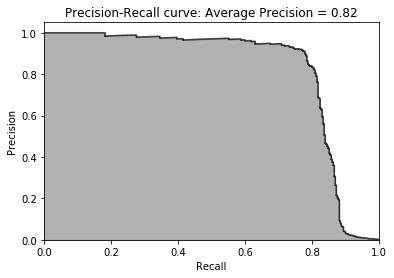

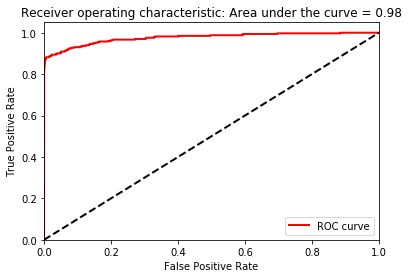

In [56]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Test Set Evaluation

In [57]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

In [58]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

In [62]:
predictionsTestSetXGBoostGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
    bst.predict(dtest)
logLossTestSetXGBoostGradientBoosting = \
    log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [64]:
predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
    gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = \
    log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

In [65]:
print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
          logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.11427630795342297
Log Loss of Random Forests on Test Set:  0.008977637185458636
Log Loss of XGBoost Gradient Boosting on Test Set:  0.0024394184927239784
Log Loss of LightGBM Gradient Boosting on Test Set:  0.0024124563836657015


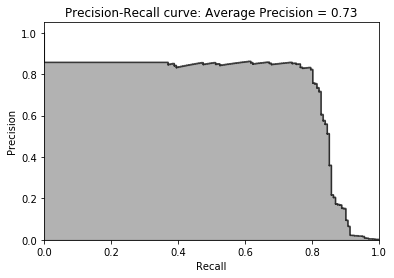

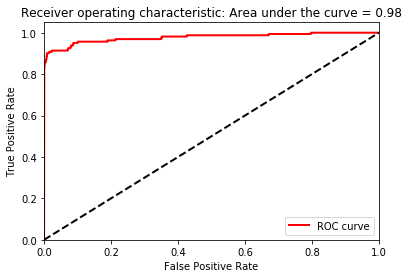

In [66]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

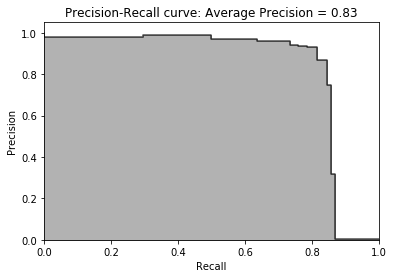

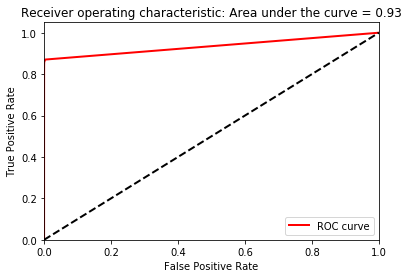

In [67]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = \
    average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

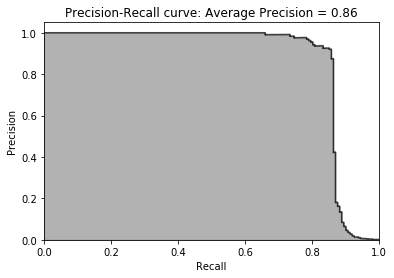

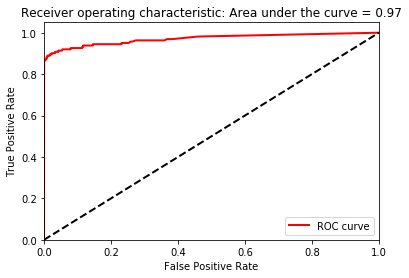

In [70]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetXGBoostGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

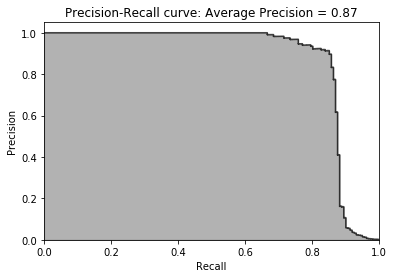

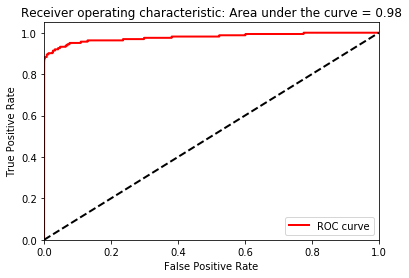

In [69]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLightGBMGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Ensemble

In [71]:
predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
    predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
    how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'] \
    .astype(float),how='left',rsuffix="2").join( \
    predictionsBasedOnKFoldsXGBoostGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="3").join( \
    predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="4")
predictionsBasedOnKFoldsFourModels.columns = \
    ['predsLR','predsRF','predsXGB','predsLightGBM']

In [72]:
X_trainWithPredictions = \
    X_train.merge(predictionsBasedOnKFoldsFourModels,
                  left_index=True,right_index=True)

In [73]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [74]:
trainingScores = []
cvScores = []
predictionsBasedOnKFoldsEnsemble = \
    pd.DataFrame(data=[],index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), \
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = \
        X_trainWithPredictions.iloc[train_index,:], \
        X_trainWithPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
        gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossEnsemble = log_loss(y_train, \
        predictionsBasedOnKFoldsEnsemble.loc[:,'prediction'])
print('Ensemble Log Loss: ', loglossEnsemble)

[1]	valid_0's binary_logloss: 0.00599212
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00593191
[3]	valid_0's binary_logloss: 0.00587654
[4]	valid_0's binary_logloss: 0.00581906
[5]	valid_0's binary_logloss: 0.00576445
[6]	valid_0's binary_logloss: 0.00572145
[7]	valid_0's binary_logloss: 0.00566985
[8]	valid_0's binary_logloss: 0.00562048
[9]	valid_0's binary_logloss: 0.00557534
[10]	valid_0's binary_logloss: 0.00553477
[11]	valid_0's binary_logloss: 0.00549438
[12]	valid_0's binary_logloss: 0.00545357
[13]	valid_0's binary_logloss: 0.00541382
[14]	valid_0's binary_logloss: 0.00537935
[15]	valid_0's binary_logloss: 0.00534618
[16]	valid_0's binary_logloss: 0.00531406
[17]	valid_0's binary_logloss: 0.00527889
[18]	valid_0's binary_logloss: 0.00524801
[19]	valid_0's binary_logloss: 0.00521777
[20]	valid_0's binary_logloss: 0.00518255
[21]	valid_0's binary_logloss: 0.005152
[22]	valid_0's binary_logloss: 0.00512167
[23]	valid_0's binary_lo

[206]	valid_0's binary_logloss: 0.0036828
[207]	valid_0's binary_logloss: 0.00368228
[208]	valid_0's binary_logloss: 0.00368182
[209]	valid_0's binary_logloss: 0.00368274
[210]	valid_0's binary_logloss: 0.00368227
[211]	valid_0's binary_logloss: 0.00368205
[212]	valid_0's binary_logloss: 0.00368169
[213]	valid_0's binary_logloss: 0.00368248
[214]	valid_0's binary_logloss: 0.00368142
[215]	valid_0's binary_logloss: 0.00368127
[216]	valid_0's binary_logloss: 0.00367965
[217]	valid_0's binary_logloss: 0.00367968
[218]	valid_0's binary_logloss: 0.00367964
[219]	valid_0's binary_logloss: 0.00367946
[220]	valid_0's binary_logloss: 0.0036793
[221]	valid_0's binary_logloss: 0.003678
[222]	valid_0's binary_logloss: 0.00367896
[223]	valid_0's binary_logloss: 0.00367797
[224]	valid_0's binary_logloss: 0.00367786
[225]	valid_0's binary_logloss: 0.00367781
[226]	valid_0's binary_logloss: 0.003678
[227]	valid_0's binary_logloss: 0.00367939
[228]	valid_0's binary_logloss: 0.00367955
[229]	valid_0's b

[410]	valid_0's binary_logloss: 0.00381082
[411]	valid_0's binary_logloss: 0.00381186
[412]	valid_0's binary_logloss: 0.00381245
[413]	valid_0's binary_logloss: 0.00381334
[414]	valid_0's binary_logloss: 0.00381476
[415]	valid_0's binary_logloss: 0.00381538
[416]	valid_0's binary_logloss: 0.00381621
[417]	valid_0's binary_logloss: 0.00381785
[418]	valid_0's binary_logloss: 0.00381927
[419]	valid_0's binary_logloss: 0.00381991
[420]	valid_0's binary_logloss: 0.00382055
[421]	valid_0's binary_logloss: 0.00382161
[422]	valid_0's binary_logloss: 0.00382226
[423]	valid_0's binary_logloss: 0.00382389
[424]	valid_0's binary_logloss: 0.00382473
[425]	valid_0's binary_logloss: 0.0038258
[426]	valid_0's binary_logloss: 0.00382664
[427]	valid_0's binary_logloss: 0.00382788
[428]	valid_0's binary_logloss: 0.00382872
[429]	valid_0's binary_logloss: 0.00382981
[430]	valid_0's binary_logloss: 0.00383065
[431]	valid_0's binary_logloss: 0.00383191
[432]	valid_0's binary_logloss: 0.00383275
[433]	valid_

[165]	valid_0's binary_logloss: 0.00246661
[166]	valid_0's binary_logloss: 0.00246204
[167]	valid_0's binary_logloss: 0.00245909
[168]	valid_0's binary_logloss: 0.00245509
[169]	valid_0's binary_logloss: 0.00245224
[170]	valid_0's binary_logloss: 0.00244778
[171]	valid_0's binary_logloss: 0.00244506
[172]	valid_0's binary_logloss: 0.00244103
[173]	valid_0's binary_logloss: 0.0024372
[174]	valid_0's binary_logloss: 0.00243263
[175]	valid_0's binary_logloss: 0.00243066
[176]	valid_0's binary_logloss: 0.0024271
[177]	valid_0's binary_logloss: 0.00242454
[178]	valid_0's binary_logloss: 0.00242085
[179]	valid_0's binary_logloss: 0.00241761
[180]	valid_0's binary_logloss: 0.00241569
[181]	valid_0's binary_logloss: 0.00241169
[182]	valid_0's binary_logloss: 0.00240954
[183]	valid_0's binary_logloss: 0.00240591
[184]	valid_0's binary_logloss: 0.00240198
[185]	valid_0's binary_logloss: 0.00239814
[186]	valid_0's binary_logloss: 0.00239433
[187]	valid_0's binary_logloss: 0.00239055
[188]	valid_0

[368]	valid_0's binary_logloss: 0.0020866
[369]	valid_0's binary_logloss: 0.00208619
[370]	valid_0's binary_logloss: 0.00208571
[371]	valid_0's binary_logloss: 0.00208475
[372]	valid_0's binary_logloss: 0.00208484
[373]	valid_0's binary_logloss: 0.00208448
[374]	valid_0's binary_logloss: 0.00208424
[375]	valid_0's binary_logloss: 0.00208389
[376]	valid_0's binary_logloss: 0.0020841
[377]	valid_0's binary_logloss: 0.00208343
[378]	valid_0's binary_logloss: 0.00208241
[379]	valid_0's binary_logloss: 0.00208208
[380]	valid_0's binary_logloss: 0.00208138
[381]	valid_0's binary_logloss: 0.00208162
[382]	valid_0's binary_logloss: 0.00208137
[383]	valid_0's binary_logloss: 0.00208063
[384]	valid_0's binary_logloss: 0.00208019
[385]	valid_0's binary_logloss: 0.00207957
[386]	valid_0's binary_logloss: 0.00207857
[387]	valid_0's binary_logloss: 0.0020781
[388]	valid_0's binary_logloss: 0.00207782
[389]	valid_0's binary_logloss: 0.00207708
[390]	valid_0's binary_logloss: 0.00207657
[391]	valid_0'

[575]	valid_0's binary_logloss: 0.00201407
[576]	valid_0's binary_logloss: 0.00201372
[577]	valid_0's binary_logloss: 0.00201351
[578]	valid_0's binary_logloss: 0.00201317
[579]	valid_0's binary_logloss: 0.00201368
[580]	valid_0's binary_logloss: 0.00201448
[581]	valid_0's binary_logloss: 0.00201433
[582]	valid_0's binary_logloss: 0.00201398
[583]	valid_0's binary_logloss: 0.00201348
[584]	valid_0's binary_logloss: 0.00201234
[585]	valid_0's binary_logloss: 0.00201146
[586]	valid_0's binary_logloss: 0.00201228
[587]	valid_0's binary_logloss: 0.00201193
[588]	valid_0's binary_logloss: 0.00201185
[589]	valid_0's binary_logloss: 0.00201242
[590]	valid_0's binary_logloss: 0.0020123
[591]	valid_0's binary_logloss: 0.00201196
[592]	valid_0's binary_logloss: 0.00201278
[593]	valid_0's binary_logloss: 0.0020127
[594]	valid_0's binary_logloss: 0.00201234
[595]	valid_0's binary_logloss: 0.002012
[596]	valid_0's binary_logloss: 0.00201179
[597]	valid_0's binary_logloss: 0.00201126
[598]	valid_0's

[772]	valid_0's binary_logloss: 0.00200083
[773]	valid_0's binary_logloss: 0.00200078
[774]	valid_0's binary_logloss: 0.00199971
[775]	valid_0's binary_logloss: 0.00199952
[776]	valid_0's binary_logloss: 0.00199948
[777]	valid_0's binary_logloss: 0.00199974
[778]	valid_0's binary_logloss: 0.0020011
[779]	valid_0's binary_logloss: 0.00200093
[780]	valid_0's binary_logloss: 0.00199991
[781]	valid_0's binary_logloss: 0.00200097
[782]	valid_0's binary_logloss: 0.00200033
[783]	valid_0's binary_logloss: 0.0020002
[784]	valid_0's binary_logloss: 0.00200057
[785]	valid_0's binary_logloss: 0.00200107
[786]	valid_0's binary_logloss: 0.00200145
[787]	valid_0's binary_logloss: 0.0020022
[788]	valid_0's binary_logloss: 0.00200214
[789]	valid_0's binary_logloss: 0.00200238
[790]	valid_0's binary_logloss: 0.00200234
[791]	valid_0's binary_logloss: 0.00200255
[792]	valid_0's binary_logloss: 0.0020018
[793]	valid_0's binary_logloss: 0.00200167
[794]	valid_0's binary_logloss: 0.00200067
[795]	valid_0's

[968]	valid_0's binary_logloss: 0.0019925
[969]	valid_0's binary_logloss: 0.00199219
[970]	valid_0's binary_logloss: 0.00199142
[971]	valid_0's binary_logloss: 0.00199192
[972]	valid_0's binary_logloss: 0.00199153
[973]	valid_0's binary_logloss: 0.00199137
[974]	valid_0's binary_logloss: 0.00199088
[975]	valid_0's binary_logloss: 0.00199144
[976]	valid_0's binary_logloss: 0.0019907
[977]	valid_0's binary_logloss: 0.00199079
[978]	valid_0's binary_logloss: 0.00199108
[979]	valid_0's binary_logloss: 0.00199105
[980]	valid_0's binary_logloss: 0.00199086
[981]	valid_0's binary_logloss: 0.001991
[982]	valid_0's binary_logloss: 0.00199223
[983]	valid_0's binary_logloss: 0.00199213
[984]	valid_0's binary_logloss: 0.0019921
[985]	valid_0's binary_logloss: 0.00199241
[986]	valid_0's binary_logloss: 0.00199238
[987]	valid_0's binary_logloss: 0.00199234
[988]	valid_0's binary_logloss: 0.00199193
[989]	valid_0's binary_logloss: 0.00199209
[990]	valid_0's binary_logloss: 0.00199224
[991]	valid_0's 

[1157]	valid_0's binary_logloss: 0.00198037
[1158]	valid_0's binary_logloss: 0.00198115
[1159]	valid_0's binary_logloss: 0.0019807
[1160]	valid_0's binary_logloss: 0.00198043
[1161]	valid_0's binary_logloss: 0.00198019
[1162]	valid_0's binary_logloss: 0.00198063
[1163]	valid_0's binary_logloss: 0.00198069
[1164]	valid_0's binary_logloss: 0.00198065
[1165]	valid_0's binary_logloss: 0.00198009
[1166]	valid_0's binary_logloss: 0.00198054
[1167]	valid_0's binary_logloss: 0.00198043
[1168]	valid_0's binary_logloss: 0.00198046
[1169]	valid_0's binary_logloss: 0.00198052
[1170]	valid_0's binary_logloss: 0.00198006
[1171]	valid_0's binary_logloss: 0.00198034
[1172]	valid_0's binary_logloss: 0.0019808
[1173]	valid_0's binary_logloss: 0.00198072
[1174]	valid_0's binary_logloss: 0.00198061
[1175]	valid_0's binary_logloss: 0.00198108
[1176]	valid_0's binary_logloss: 0.00198098
[1177]	valid_0's binary_logloss: 0.00198086
[1178]	valid_0's binary_logloss: 0.0019805
[1179]	valid_0's binary_logloss: 0.

[1349]	valid_0's binary_logloss: 0.00199724
[1350]	valid_0's binary_logloss: 0.00199698
[1351]	valid_0's binary_logloss: 0.00199688
[1352]	valid_0's binary_logloss: 0.00199673
[1353]	valid_0's binary_logloss: 0.00199669
[1354]	valid_0's binary_logloss: 0.00199678
[1355]	valid_0's binary_logloss: 0.00199673
[1356]	valid_0's binary_logloss: 0.00199668
[1357]	valid_0's binary_logloss: 0.00199629
[1358]	valid_0's binary_logloss: 0.00199653
[1359]	valid_0's binary_logloss: 0.00199732
[1360]	valid_0's binary_logloss: 0.00199741
[1361]	valid_0's binary_logloss: 0.00199811
[1362]	valid_0's binary_logloss: 0.00199747
[1363]	valid_0's binary_logloss: 0.0019984
[1364]	valid_0's binary_logloss: 0.00199831
[1365]	valid_0's binary_logloss: 0.00199879
[1366]	valid_0's binary_logloss: 0.00199934
[1367]	valid_0's binary_logloss: 0.00199942
[1368]	valid_0's binary_logloss: 0.00200022
[1369]	valid_0's binary_logloss: 0.00200001
[1370]	valid_0's binary_logloss: 0.00200015
[1371]	valid_0's binary_logloss: 

[105]	valid_0's binary_logloss: 0.00346833
[106]	valid_0's binary_logloss: 0.00346016
[107]	valid_0's binary_logloss: 0.00345326
[108]	valid_0's binary_logloss: 0.00344586
[109]	valid_0's binary_logloss: 0.00343788
[110]	valid_0's binary_logloss: 0.00343006
[111]	valid_0's binary_logloss: 0.00342353
[112]	valid_0's binary_logloss: 0.00341606
[113]	valid_0's binary_logloss: 0.00340805
[114]	valid_0's binary_logloss: 0.00340186
[115]	valid_0's binary_logloss: 0.00339469
[116]	valid_0's binary_logloss: 0.00338752
[117]	valid_0's binary_logloss: 0.00338049
[118]	valid_0's binary_logloss: 0.00337424
[119]	valid_0's binary_logloss: 0.00336854
[120]	valid_0's binary_logloss: 0.00336278
[121]	valid_0's binary_logloss: 0.00335654
[122]	valid_0's binary_logloss: 0.00335002
[123]	valid_0's binary_logloss: 0.0033448
[124]	valid_0's binary_logloss: 0.00333816
[125]	valid_0's binary_logloss: 0.00333173
[126]	valid_0's binary_logloss: 0.00332618
[127]	valid_0's binary_logloss: 0.00332014
[128]	valid_

[298]	valid_0's binary_logloss: 0.00292964
[299]	valid_0's binary_logloss: 0.00293017
[300]	valid_0's binary_logloss: 0.00292931
[301]	valid_0's binary_logloss: 0.00292898
[302]	valid_0's binary_logloss: 0.0029283
[303]	valid_0's binary_logloss: 0.00292663
[304]	valid_0's binary_logloss: 0.00292705
[305]	valid_0's binary_logloss: 0.00292744
[306]	valid_0's binary_logloss: 0.00292678
[307]	valid_0's binary_logloss: 0.00292719
[308]	valid_0's binary_logloss: 0.00292705
[309]	valid_0's binary_logloss: 0.00292516
[310]	valid_0's binary_logloss: 0.00292563
[311]	valid_0's binary_logloss: 0.00292503
[312]	valid_0's binary_logloss: 0.00292488
[313]	valid_0's binary_logloss: 0.00292532
[314]	valid_0's binary_logloss: 0.00292433
[315]	valid_0's binary_logloss: 0.00292336
[316]	valid_0's binary_logloss: 0.00292158
[317]	valid_0's binary_logloss: 0.00292077
[318]	valid_0's binary_logloss: 0.0029203
[319]	valid_0's binary_logloss: 0.00292081
[320]	valid_0's binary_logloss: 0.00291956
[321]	valid_0

[697]	valid_0's binary_logloss: 0.00285545
[698]	valid_0's binary_logloss: 0.00285558
[699]	valid_0's binary_logloss: 0.00285669
[700]	valid_0's binary_logloss: 0.0028558
[701]	valid_0's binary_logloss: 0.00285521
[702]	valid_0's binary_logloss: 0.00285553
[703]	valid_0's binary_logloss: 0.00285646
[704]	valid_0's binary_logloss: 0.00285703
[705]	valid_0's binary_logloss: 0.00285747
[706]	valid_0's binary_logloss: 0.00285711
[707]	valid_0's binary_logloss: 0.00285741
[708]	valid_0's binary_logloss: 0.00285834
[709]	valid_0's binary_logloss: 0.00285793
[710]	valid_0's binary_logloss: 0.00285847
[711]	valid_0's binary_logloss: 0.00285827
[712]	valid_0's binary_logloss: 0.00285868
[713]	valid_0's binary_logloss: 0.00285828
[714]	valid_0's binary_logloss: 0.00285893
[715]	valid_0's binary_logloss: 0.00285815
[716]	valid_0's binary_logloss: 0.00285872
[717]	valid_0's binary_logloss: 0.00285915
[718]	valid_0's binary_logloss: 0.00285859
[719]	valid_0's binary_logloss: 0.00285968
[720]	valid_

[164]	valid_0's binary_logloss: 0.00358664
[165]	valid_0's binary_logloss: 0.00358318
[166]	valid_0's binary_logloss: 0.00357981
[167]	valid_0's binary_logloss: 0.00357706
[168]	valid_0's binary_logloss: 0.00357323
[169]	valid_0's binary_logloss: 0.00356873
[170]	valid_0's binary_logloss: 0.00356601
[171]	valid_0's binary_logloss: 0.00356228
[172]	valid_0's binary_logloss: 0.00355942
[173]	valid_0's binary_logloss: 0.00355607
[174]	valid_0's binary_logloss: 0.00355243
[175]	valid_0's binary_logloss: 0.00354956
[176]	valid_0's binary_logloss: 0.00354604
[177]	valid_0's binary_logloss: 0.00354318
[178]	valid_0's binary_logloss: 0.00354018
[179]	valid_0's binary_logloss: 0.00353659
[180]	valid_0's binary_logloss: 0.00353397
[181]	valid_0's binary_logloss: 0.00353029
[182]	valid_0's binary_logloss: 0.00352696
[183]	valid_0's binary_logloss: 0.00352442
[184]	valid_0's binary_logloss: 0.00352153
[185]	valid_0's binary_logloss: 0.0035192
[186]	valid_0's binary_logloss: 0.00351585
[187]	valid_

[370]	valid_0's binary_logloss: 0.0034006
[371]	valid_0's binary_logloss: 0.00340111
[372]	valid_0's binary_logloss: 0.00340143
[373]	valid_0's binary_logloss: 0.00340084
[374]	valid_0's binary_logloss: 0.00340015
[375]	valid_0's binary_logloss: 0.00339991
[376]	valid_0's binary_logloss: 0.00339964
[377]	valid_0's binary_logloss: 0.00340035
[378]	valid_0's binary_logloss: 0.00340093
[379]	valid_0's binary_logloss: 0.00339955
[380]	valid_0's binary_logloss: 0.00339893
[381]	valid_0's binary_logloss: 0.00339952
[382]	valid_0's binary_logloss: 0.00339791
[383]	valid_0's binary_logloss: 0.00339802
[384]	valid_0's binary_logloss: 0.00339746
[385]	valid_0's binary_logloss: 0.00339782
[386]	valid_0's binary_logloss: 0.00339685
[387]	valid_0's binary_logloss: 0.00339697
[388]	valid_0's binary_logloss: 0.00339735
[389]	valid_0's binary_logloss: 0.00339705
[390]	valid_0's binary_logloss: 0.00339705
[391]	valid_0's binary_logloss: 0.00339744
[392]	valid_0's binary_logloss: 0.00339824
[393]	valid_

[564]	valid_0's binary_logloss: 0.00341343
[565]	valid_0's binary_logloss: 0.00341322
[566]	valid_0's binary_logloss: 0.00341368
[567]	valid_0's binary_logloss: 0.00341375
[568]	valid_0's binary_logloss: 0.00341358
[569]	valid_0's binary_logloss: 0.00341312
[570]	valid_0's binary_logloss: 0.00341305
[571]	valid_0's binary_logloss: 0.00341295
[572]	valid_0's binary_logloss: 0.00341326
[573]	valid_0's binary_logloss: 0.00341413
[574]	valid_0's binary_logloss: 0.00341378
[575]	valid_0's binary_logloss: 0.00341264
[576]	valid_0's binary_logloss: 0.00341281
[577]	valid_0's binary_logloss: 0.00341271
[578]	valid_0's binary_logloss: 0.00341318
[579]	valid_0's binary_logloss: 0.00341356
[580]	valid_0's binary_logloss: 0.00341318
[581]	valid_0's binary_logloss: 0.00341368
[582]	valid_0's binary_logloss: 0.00341303
[583]	valid_0's binary_logloss: 0.00341394
[584]	valid_0's binary_logloss: 0.00341283
[585]	valid_0's binary_logloss: 0.00341274
[586]	valid_0's binary_logloss: 0.00341324
[587]	valid

[108]	valid_0's binary_logloss: 0.00319055
[109]	valid_0's binary_logloss: 0.00318267
[110]	valid_0's binary_logloss: 0.00317423
[111]	valid_0's binary_logloss: 0.00316678
[112]	valid_0's binary_logloss: 0.0031579
[113]	valid_0's binary_logloss: 0.00315101
[114]	valid_0's binary_logloss: 0.00314379
[115]	valid_0's binary_logloss: 0.0031353
[116]	valid_0's binary_logloss: 0.00312725
[117]	valid_0's binary_logloss: 0.00312028
[118]	valid_0's binary_logloss: 0.0031136
[119]	valid_0's binary_logloss: 0.00310568
[120]	valid_0's binary_logloss: 0.00309866
[121]	valid_0's binary_logloss: 0.0030906
[122]	valid_0's binary_logloss: 0.00308314
[123]	valid_0's binary_logloss: 0.00307521
[124]	valid_0's binary_logloss: 0.00306872
[125]	valid_0's binary_logloss: 0.00306105
[126]	valid_0's binary_logloss: 0.00305496
[127]	valid_0's binary_logloss: 0.00304798
[128]	valid_0's binary_logloss: 0.00304368
[129]	valid_0's binary_logloss: 0.00303699
[130]	valid_0's binary_logloss: 0.00302951
[131]	valid_0's

[300]	valid_0's binary_logloss: 0.00257783
[301]	valid_0's binary_logloss: 0.00257699
[302]	valid_0's binary_logloss: 0.0025775
[303]	valid_0's binary_logloss: 0.00257712
[304]	valid_0's binary_logloss: 0.00257646
[305]	valid_0's binary_logloss: 0.00257578
[306]	valid_0's binary_logloss: 0.00257624
[307]	valid_0's binary_logloss: 0.00257604
[308]	valid_0's binary_logloss: 0.00257654
[309]	valid_0's binary_logloss: 0.00257635
[310]	valid_0's binary_logloss: 0.00257574
[311]	valid_0's binary_logloss: 0.00257434
[312]	valid_0's binary_logloss: 0.00257408
[313]	valid_0's binary_logloss: 0.0025727
[314]	valid_0's binary_logloss: 0.00257261
[315]	valid_0's binary_logloss: 0.00257325
[316]	valid_0's binary_logloss: 0.00257312
[317]	valid_0's binary_logloss: 0.00257305
[318]	valid_0's binary_logloss: 0.002572
[319]	valid_0's binary_logloss: 0.00257094
[320]	valid_0's binary_logloss: 0.00257065
[321]	valid_0's binary_logloss: 0.00257077
[322]	valid_0's binary_logloss: 0.00257032
[323]	valid_0's

In [75]:
print('Feature importances:', list(gbm.feature_importance()))

Feature importances: [165, 216, 120, 106, 281, 50, 77, 74, 100, 38, 96, 220, 130, 91, 593, 144, 146, 80, 63, 258, 111, 109, 140, 110, 54, 88, 178, 72, 150, 318, 438, 164, 320, 0]


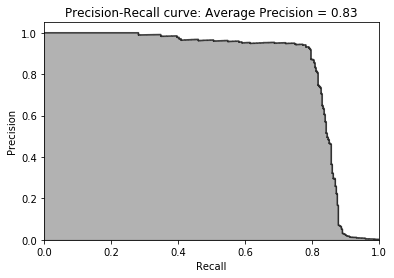

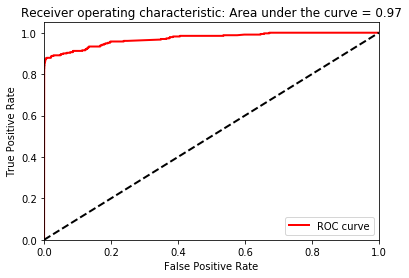

In [76]:
preds = pd.concat([y_train,predictionsBasedOnKFoldsEnsemble.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

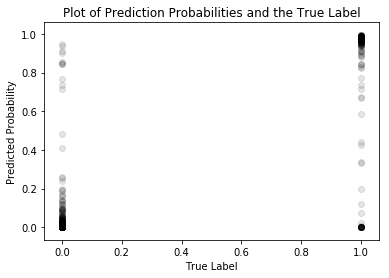

In [110]:
scatterData = predictionsTestSetLightGBMGradientBoosting.join(y_test,how='left')
scatterData.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k', 
                 fit_reg=False, scatter_kws={'alpha':0.1},
                 data=scatterData).set_title( \
                'Plot of Prediction Probabilities and the True Label')

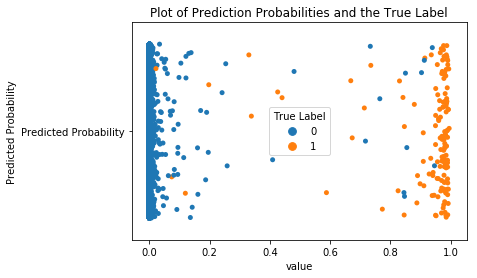

In [113]:
scatterDataMelted = pd.melt(scatterData, "True Label", \
                            var_name="Predicted Probability")
ax = sns.stripplot(x="value", y="Predicted Probability", \
                   hue='True Label', jitter=0.4, \
                   data=scatterDataMelted).set_title( \
                   'Plot of Prediction Probabilities and the True Label')

In [114]:
'''Pipeline for New Data'''
# first, import new data into a dataframe called 'newData'
# second, scale data
# newData.loc[:,featuresToScale] = sX.transform(newData[featuresToScale])
# third, predict using LightGBM
# gbm.predict(newData, num_iteration=gbm.best_iteration)

'Pipeline for New Data'